## Context Vectors Creation for CELTIC

This notebook demonstrates the process of creating context vectors to be used with CELTIC. It uses two pre-downloaded field-of-view (FoV) images for the analysis. If additional images are needed, they can be downloaded from the Allen Institute’s [hiPSC Single-Cell Image Dataset](https://open.quiltdata.com/b/allencell/packages/aics/hipsc_single_cell_image_dataset).

The notebook covers steps to extract single-cell images, generate context vectors, and save the outputs for training and prediction. All necessary resources and code are provided to replicate the context creation process or adapt it for new FoVs.


### CELTIC installation (if needed)

In [ ]:
# package installation (if not previously installed, e.g for Colab users)
!git clone https://github.com/zaritskylab/CELTIC
%cd CELTIC
!pip install .

### Initializations

In [1]:
# set the absolute path to the CELTIC repo
REPO_ROOT = "/content/CELTIC"

# set the organelle (keep microtubules for this example)
organelle = 'microtubules' 

In [ ]:
from celtic.preprocess.context_creator import ContextVectorsCreator
from celtic.utils.functions import show_images_subplots, download_example_files
import tifffile
from pathlib import Path
import os

assert os.path.exists(REPO_ROOT) and REPO_ROOT.endswith("CELTIC"), "REPO_ROOT misconfiguration"

abs_path_resources_dir = Path(f'{REPO_ROOT}/resources/{organelle}') # location of the samples to be downloaded

### Download the demo samples

Download from the BioImage dataset the microtubules FOV metadata csv, two samples of FOV images, and their related FOV segemnation images (<5 min)


In [ ]:
download_example_files(abs_path_resources_dir, "context_creation")

### ContextVectorsCreator Initialization

In this section we initialize the ContextVectorsCreator object that generates context vectors for the specified organelle.

- **`organelle`**: The organelle of interest, such as microtubules in this example.

- **`fovs_to_process`**: A list of Field-of-View (FoV) identifiers (in this case, 94 and 116) indicating which images will be processed. These FoVs represent subsets of the data for which the context vectors will be generated.

- **`metadata_path`**: The path to a CSV file indicating the FOV images locations and the channel specifications. 

- **`models_dir`**: A directory containing pretrained models required by the context creator, and configuration files.

- **`fov_images_dir`**: The directory in which the FOV images are stored.

- **`single_cell_image_dir`**: The directory where the single-cell images are stored. These images will be used as input for processing within the ContextVectorsCreator class.

In [5]:
creator = ContextVectorsCreator(organelle,
                                fovs_to_process = [94, 116],
                                metadata_path = f'{abs_path_resources_dir}/fov_metadata/metadata.csv',
                                models_dir = f'{abs_path_resources_dir}/models',
                                fov_images_dir = abs_path_resources_dir,
                                single_cell_image_dir='./single_cells')

### Extracting Single Cell Images

In our BioImage dataset, we already provide single-cell images from 180 FOVs per organelle, as well as the context vectors for these cells, stored in the `context.csv`. While this context data is already available, this code is provided to explain how the context was created and to enable the generation of context for FOVs not included in this study. 

The process is time-consuming, so it is recommended to save the extracted images locally for future use.

The `extract_single_cell_images()` method performs the following tasks:

 * Extracts single-cell images from the specified FOVs.

 * Pre-computes the necessary data that will be used for context creation in later steps.



In [6]:
creator.extract_single_cell_images()

Processing FOVId 94
.... CellId 233289
.... CellId 233293
.... CellId 233295
.... CellId 233296
.... CellId 233297
.... CellId 233303
.... CellId 233304
.... CellId 233305
.... CellId 233306
.... CellId 233307
.... CellId 233308
.... CellId 233310
.... CellId 233311
.... CellId 233312
Processing FOVId 116
.... CellId 233419
.... CellId 233420
.... CellId 233422
.... CellId 233423
.... CellId 233424
.... CellId 233427
.... CellId 233430
.... CellId 233432
.... CellId 233433
.... CellId 233434
.... CellId 233440
.... CellId 233441


Cell 233441 of FOV 116 (z = 18)


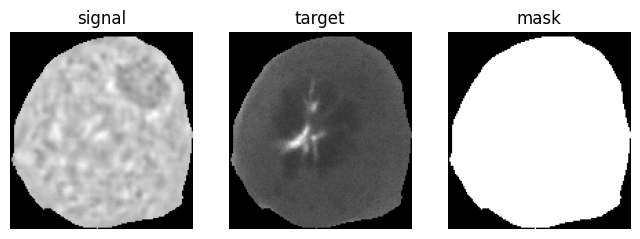

In [42]:
# A cropped single cell example
fov_id = 116
cell_id = 233441

image_types = ['signal', 'target', 'mask']
images = [tifffile.imread(f'{creator.single_cell_image_dir}/{fov_id}_{cell_id}_{image_type}.tiff') for image_type in image_types]
z = images[0].shape[0]//2
images = [img[z] for img in images]
show_images_subplots(shape=(1,3), images=images, titles=image_types, figsize=(8,15), cmap='gray', axis_off=True)

print(f"Cell {cell_id} of FOV {fov_id} (z = {z})")  

### Creating Context Vectors

In this step, we define the contexts of interest and use the `create_context_vectors()` method to generate context vectors for the specified FoVs. The `contexts` variable lists the types of context data to include. In this example, all implemented contexts are used.

For detailed definitions of the context types, refer to the  [paper](https://www.biorxiv.org/content/10.1101/2024.11.10.622841v1.full) under the subsection **"CELTIC, cell-context dependent in silico labeling"** in the results section.

The output of this function is a DataFrame containing the context vectors. This DataFrame can be saved and referenced using variables like `path_context_csv` and `context_features`, which are later used in the training and prediction steps.


In [46]:
contexts = ['cell_stage', 'location', 'classic_shape', 'ml_shape', 'neighborhood_density']
context_df = creator.create_context_vectors(contexts)
context_df

_cell_stage
_location
_classic_shape
_ml_shape
_neighborhood_density


,cell_stage_0,cell_stage_1,cell_stage_2,cell_stage_3,cell_stage_4,cell_stage_5,location,classic_shape_0,classic_shape_1,classic_shape_2,classic_shape_3,classic_shape_4,ml_shape_0,ml_shape_1,ml_shape_2,neighborhood_density
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0.636364
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.181818
2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.636364
3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.545455
4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.181818
5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.363636
6,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.363636
7,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.636364
8,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.454545
9,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.545455


In [47]:
# this is the context of the cell chosen in the previous example
cell_index = creator.metadata[creator.metadata['CellId']==cell_id].index[0]
position = creator.metadata.index.get_loc(cell_index)
context_df.iloc[position]

cell_stage_0            0.000000
cell_stage_1            0.000000
cell_stage_2            0.000000
cell_stage_3            0.000000
cell_stage_4            0.000000
cell_stage_5            1.000000
location                0.000000
classic_shape_0         1.000000
classic_shape_1         0.000000
classic_shape_2         0.000000
classic_shape_3         0.000000
classic_shape_4         0.000000
ml_shape_0              0.000000
ml_shape_1              0.000000
ml_shape_2              1.000000
neighborhood_density    0.454545
Name: 25, dtype: float64